In [1]:
import numpy as np
from scipy import sparse
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

# Mutual nearest neighbor -- a demo

In [2]:
def knn_to_adjmtx(knn, shape):
    """
    """
    m, n = knn.shape
    
    rows = np.repeat(np.arange(m), n)
    cols = knn.reshape(-1,)
    data = np.ones(len(rows), dtype=int)
    adjmtx = sparse.coo_matrix((data, (rows, cols)), shape=shape)
    return adjmtx

In [3]:
a = np.random.randn(120,2)
b = 1+np.random.randn(100,2)
print(a.shape, b.shape)

(120, 2) (100, 2)


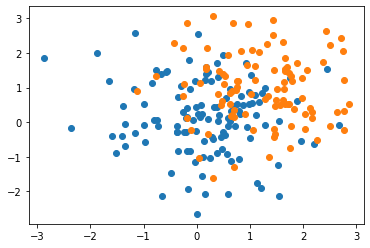

In [4]:
plt.scatter(a[:,0], a[:,1])
plt.scatter(b[:,0], b[:,1])

In [5]:
aindex = cKDTree(a)
bindex = cKDTree(b)

In [6]:
bna_dists, bna_idx = aindex.query(b, k=5)
anb_dists, anb_idx = bindex.query(a, k=5)

In [7]:
bna_adj = knn_to_adjmtx(bna_idx, shape=(len(b), len(a)))
anb_adj = knn_to_adjmtx(anb_idx, shape=(len(a), len(b)))
print(bna_adj.shape, anb_adj.shape)

(100, 120) (120, 100)


In [8]:
mnn_adj = bna_adj.T.multiply(anb_adj).tocoo()
mnn_adj

<120x100 sparse matrix of type '<class 'numpy.int64'>'
	with 230 stored elements in COOrdinate format>

In [9]:
# list(zip(mnn_adj.row, mnn_adj.col)) # a-b pairs

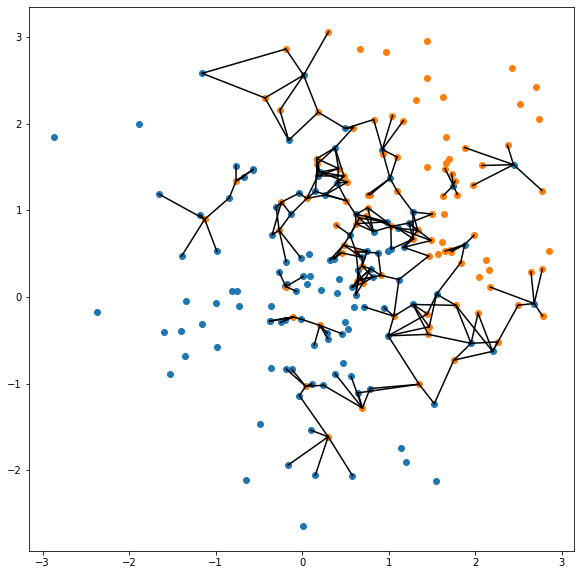

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(a[:,0], a[:,1])
ax.scatter(b[:,0], b[:,1])

for ai, bi in zip(mnn_adj.row, mnn_adj.col):
    a_x, a_y = a[ai]
    b_x, b_y = b[bi]
    ax.plot([a_x, b_x], [a_y, b_y], color='k', zorder=1)
    

ax.set_aspect('equal')